# Introduction

<font size=4> This dateset is from Kaggle, one of the biggest data science platform around the world, and it describles the listing activities on Airbnb in NewYork Cities in United States. There are several questions I expect to discover from this dataset.<br>
Data Source : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data <br>
1. Which house has the most duplicated listings?
2. Which host owes the most houses in NY city?
3. Which house is the popular one?
4. What is the region distribution of houses posted on airbnb?
5. What is the distribution of rooms offered by minimum night for people to stay in NY?
6. What is the travel season or month in NY based on the last review?
7. Which factor affect the price most?
8. Which region has the highest price? explore to the smaller neighbourhood
9. Which is the price distribution of different regions?
10. Which host earned the most in the given period?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [3]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


# data preprocessing

In [4]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
len(airbnb)

48895

In [6]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## duplicated

In [8]:
airbnb.duplicated().sum()

0

## null data

In [9]:
total = airbnb.isnull().sum().sort_values(ascending=False)
percent = (airbnb.isnull().sum() / airbnb.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


### host_name

<font size=3>Action: try to fill null host_name data by host_id

In [10]:
host_name_null = airbnb[airbnb['host_name'].isnull()]
host_id_n = list(host_name_null['host_id'])

In [11]:
len(airbnb[airbnb['host_id'].apply(lambda x: x in host_id_n)])

21

<font size=4> Found : Unfortunately, the data missed host_name variable can not be filled because there is no other data which has the same host_id as these missing data. Although there is missing data in host_name, I wil not delete them because I still have host_id to use

In [12]:
host_name_null.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0


### name

In [13]:
name_null = airbnb[airbnb['name'].isnull()]

In [14]:
len(airbnb['id'].unique())

48895

<font size=4> Each row has its own ID, the id does not mean the id of item</font>

### last_review

In [15]:
# change from object type to date type
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format='%Y-%m-%d')
type(airbnb.loc[0,'last_review'])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
print("the oldest one:", airbnb['last_review'].min())
print("the latest one:", airbnb['last_review'].max())

the oldest one: 2011-03-28 00:00:00
the latest one: 2019-07-08 00:00:00


<font size=4> Honest speaking, in this dataset, data are different from each other,and thus it is different to fill missing values

### review_per_month

<font size=4> to see if the data without last_review lose its data in review_per_month at the same time

In [17]:
tmp = airbnb[airbnb['last_review'].isnull()]
print('number of last_review with null data:', len(tmp))
print("number of null data in both last_review and review_per_month:",
      len(tmp[tmp['reviews_per_month'].isnull()]))


number of last_review with null data: 10052
number of null data in both last_review and review_per_month: 10052


<font size=4> Found : Data lost its last_review data did not have its review_per_month, either

# EDA

## Q1 : the most duplicated posting

<font size=4> Some people tend to post several listings on airbnb, and they post will affect some further statistics, such as calculating duplicated prices. Thus, I wnat to figure out in this section.

In [47]:
# the duplicate listings usually have some name and host_id
duplicate = airbnb.groupby(['name', 'host_id', 'price']).count().sort_values('id', ascending=False)

In [48]:
duplicate.head(5)

,,,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
name,host_id,price,,,,,,,,,,,,,,,
Hillside Hotel,134184451,135,12,12,12,12,12,12,12,12,12,5,5,12,12,5,5
Loft Suite @ The Box House Hotel,417504,199,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Artsy Private BR in Fort Greene Cumberland,230192510,48,10,10,10,10,10,10,10,10,10,0,0,10,10,0,0
Hillside Hotel,134184451,165,5,5,5,5,5,5,5,5,5,1,1,5,5,1,1
IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS,76104209,175,5,5,5,5,5,5,5,5,5,0,0,5,5,0,0


In [22]:
airbnb[airbnb['name'] == "Hillside Hotel"].head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaT,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaT,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaT,NaN,18,365


In [23]:
airbnb[airbnb['name']=='Loft Suite @ The Box House Hotel'].head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
668,253466,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73693,-73.95284,Entire home/apt,199,3,33,2019-06-24,0.47,28,60
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60
675,253803,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73708,-73.95271,Entire home/apt,199,3,23,2019-06-22,0.26,28,60
676,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73652,-73.95236,Entire home/apt,199,3,43,2019-07-02,0.47,28,60
677,253811,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73693,-73.95316,Entire home/apt,199,3,30,2019-07-03,0.32,28,56
678,253815,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73784,-73.95324,Entire home/apt,199,3,39,2019-06-29,0.44,28,84


<font size=4> **Top three popular houses.**<br>Hillside Hotel (12) The one has two different price<br> Loft Suite @ The Box House Hotel (11)<br>Artsy Private BR in Fort Greene Cumberland(10)

## Q2 : the host has the most houses

In [25]:
tmp = airbnb.dropna(subset=['name'], axis=0)
uni_listing = tmp.drop_duplicates(subset = ["name"]) #drop duplicated listings
uni_listing.groupby(['host_id','host_name']).count().sort_values('id', ascending=False)

,,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,host_name,,,,,,,,,,,,,,
219517861,Sonder (NYC),311,311,311,311,311,311,311,311,311,311,205,205,311,311
107434423,Blueground,231,231,231,231,231,231,231,231,231,231,28,28,231,231
30283594,Kara,121,121,121,121,121,121,121,121,121,121,43,43,121,121
137358866,Kazuya,103,103,103,103,103,103,103,103,103,103,51,51,103,103
16098958,Jeremy & Laura,96,96,96,96,96,96,96,96,96,96,61,61,96,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13322263,Aj,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13322259,Alex,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13322169,Sonja,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [26]:
uni_listing[uni_listing['host_id'] == 219517861].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaT,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81


In [27]:
uni_listing[uni_listing['host_id'] == 107434423].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,NaT,NaN,232,156
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,NaT,NaN,232,223
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,NaT,NaN,232,316


<font size=4> Found : From above result, there is an issue. Some houses with very similar latitude and longitude has different names. I am not sure whether these houses are same but with different names or different properties. However, in the same apartment, it is difficult to differentiate a property from another one by longitude and latitude. The better way is to differentiate them by address, but there is no address offered in this dataset. As a result, it is difficult to fix this issue. However, there is a clue to prove these houses with diffenent name but very similar latitude and longitude are different properties. These houses are owned by real estate companies, such as Sonder(NYC), Blueground. Therefore, it is possible that a company has over 100 properties

<font size=4> **Top three owener with many properties.**<br>Sonder(NYC) (311)<br> Blueground (231)<br> Kara(121)

## Q3 : the most  popular one

<font size=4> The one with more numbers of reviews mean the host is more popular, and thus I will analyze the popular list by reviews

### the most popular item

In [24]:
property_mr = airbnb.groupby(['name','host_id']).sum().sort_values('number_of_reviews', ascending=False)

In [25]:
property_mr[['number_of_reviews']].head(10)

,,number_of_reviews
name,host_id,
Room near JFK Queen Bed,47621202,629
Great Bedroom in Manhattan,4734398,607
Beautiful Bedroom in Manhattan,4734398,597
Private Bedroom in Manhattan,4734398,594
Room Near JFK Twin Beds,47621202,576
Steps away from Laguardia airport,37312959,543
Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,540
Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,510
Private brownstone studio Brooklyn,12949460,488


In [26]:
airbnb[airbnb['name'] == 'Room near JFK Queen Bed']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


### the most popular host

In [64]:
host_mr = airbnb.groupby(['host_id']).sum().sort_values('number_of_reviews', ascending=False)

In [66]:
host_mr[['number_of_reviews']].head(10)

,number_of_reviews
host_id,
37312959,2273
344035,2205
26432133,2017
35524316,1971
40176101,1818
4734398,1798
16677326,1355
6885157,1346
219517861,1281


In [68]:
airbnb[airbnb['host_id'] == 37312959]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9323,7125107,Room steps away from LaGuardia airport,37312959,Maya,Queens,East Elmhurst,40.77005,-73.87691,Private room,45,1,448,2019-07-07,9.63,5,166
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
13612,10186192,Only Steps away from LaGuardia arpt,37312959,Maya,Queens,East Elmhurst,40.77026,-73.87561,Private room,45,1,459,2019-07-07,10.72,5,175
14699,11618854,Walking distance to LaGuardia airport,37312959,Maya,Queens,East Elmhurst,40.77107,-73.87559,Private room,45,1,412,2019-07-01,10.19,5,159
18045,14133414,Space to rest near LaGuardia Airport,37312959,Maya,Queens,East Elmhurst,40.77009,-73.87708,Private room,32,1,411,2019-07-04,11.40,5,161


## Q4 : neighbourhood_group

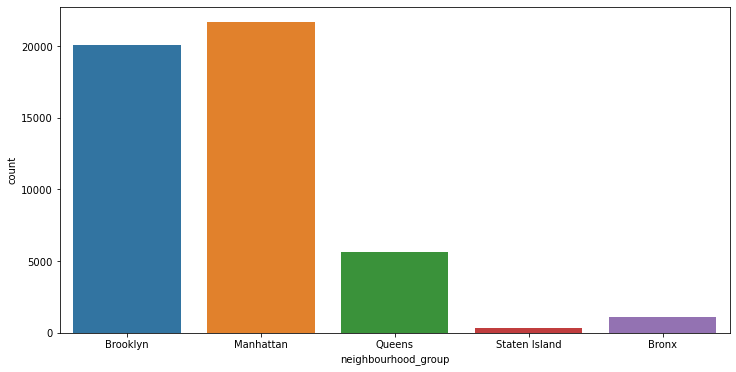

In [29]:
plt.figure(figsize=(12,6))

sns.countplot(x='neighbourhood_group', data=airbnb)

<font size=4> Brooklyn and Manhattan are the two popular choices on airbnb in NewYork

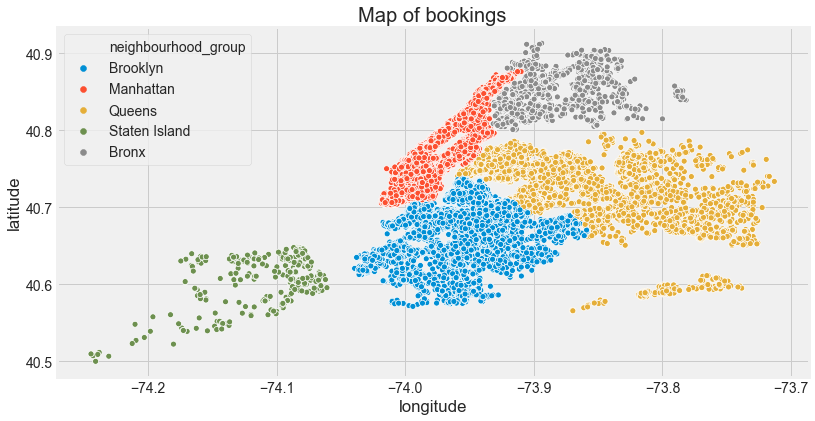

In [77]:
plt.figure(figsize=(12,6))

plt.style.use('fivethirtyeight')

plt.title('Map of bookings')

sns.scatterplot(x='longitude', y='latitude', data=airbnb, hue='neighbourhood_group')

plt.show()

## Q5 : number of nights

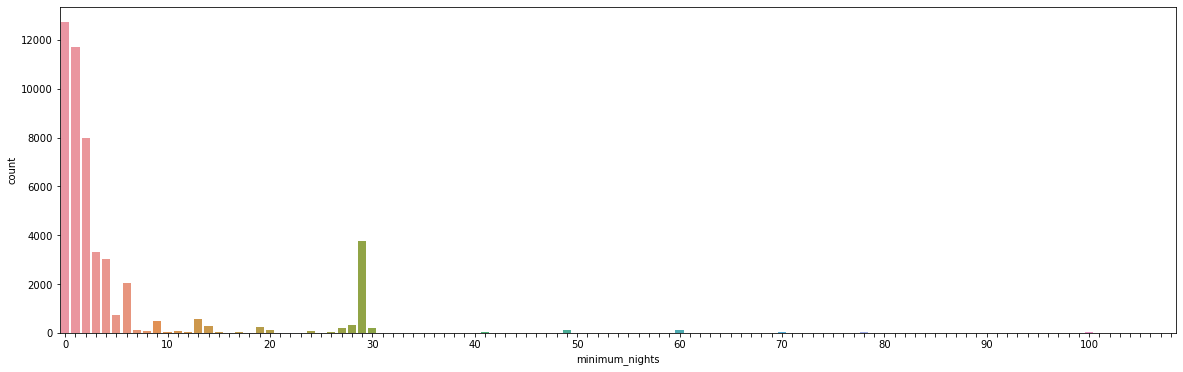

In [31]:
plt.figure(figsize=(20,6))

ax = sns.countplot(x='minimum_nights', data=airbnb)

x_labels = ['' if i%10 != 0 else str(i) for i in range(airbnb['minimum_nights'].max())]

ax.set_xticklabels(x_labels)

plt.show()

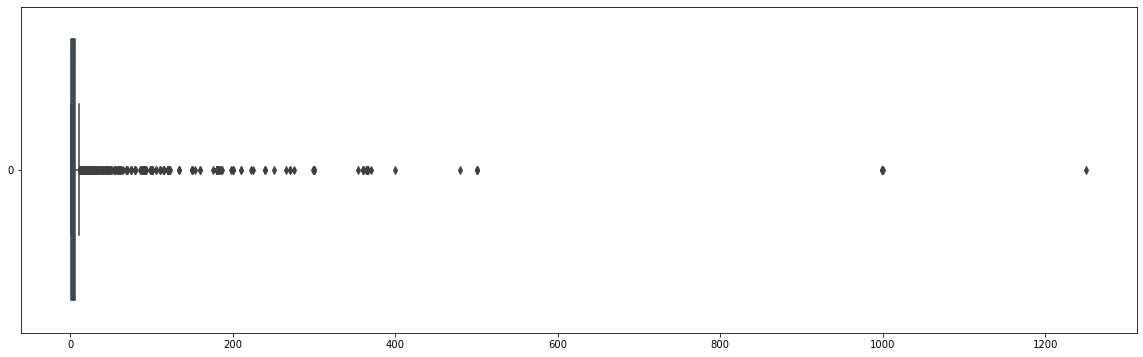

In [32]:
plt.figure(figsize=(20,6))
sns.boxplot(data=airbnb["minimum_nights"],orient='h')

In [35]:
## more than half a year
more183 = airbnb[airbnb['minimum_nights']>183].sort_values("minimum_nights", ascending=False)
print(len(more183))

77


In [36]:
## more than a year
more365 = airbnb[airbnb['minimum_nights']>365].sort_values("minimum_nights", ascending=False)
print(len(more365))

14


<font size=4> Found: bookings available for one night are the most common one, followed by two nights and three nights. People usually use airbnb for traveling. Additionally, some people rent a place on airbnb for a month, a peak showed at 29 days. Only few people rented a house by airbnb for more than half a year, 77 in all only.

### rent a month

In [41]:
monthrented = airbnb[(airbnb['minimum_nights']==29) | (airbnb['minimum_nights']==30)]

In [42]:
len(monthrented)

4100

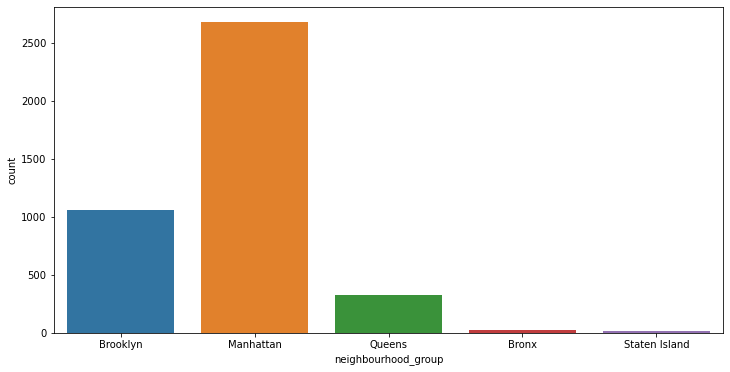

In [43]:
plt.figure(figsize=(12,6))

sns.countplot(x='neighbourhood_group', data=monthrented)

<font size=4> In Manhattan, more houses offer one month options than the other regions. I suppose they had business traveling there.

## year

<font size=4, color='red'> According to the regulation by airbnb, traveler have to submit their reviews within <mark>14</mark> days from the time of checkout. </font> <font size=4> Therefore, I can find which month is the most popular based on the last visit (last_review) although some places may be visited several times in a short period.

In [29]:
airbnb['year'] = airbnb['last_review'].dt.year
airbnb['month'] = airbnb['last_review'].dt.month

In [30]:
airbnb.year.value_counts()

2019.0    25209
2018.0     6050
2017.0     3205
2016.0     2707
2015.0     1393
2014.0      199
2013.0       48
2012.0       25
2011.0        7
Name: year, dtype: int64

In [34]:
25209/len(airbnb)

0.5155741895899376

<font size=4> If the time of last review mean the last time visited by people of the property. around 50% lists on airbnb were not booked for more than a year.

## Q6 : month

Text(0.5, 1.0, 'Number of bookings by month')

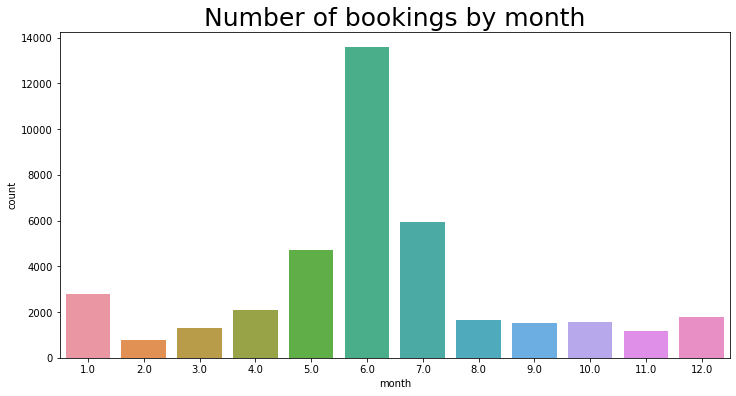

In [33]:
plt.figure(figsize=(12,6))

sns.countplot(x='month', data=airbnb)
plt.title("Number of bookings by month", fontsize=25)

## room_type

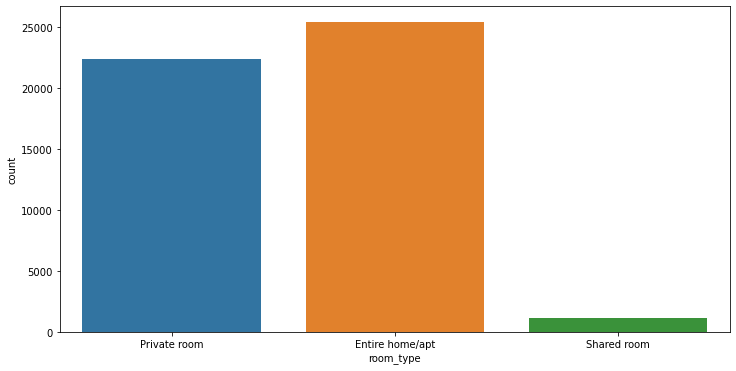

In [45]:
plt.figure(figsize=(12,6))

sns.countplot(x='room_type', data=airbnb)

<font size=4> instead of shared room, people prefer private room and entire home/apt room_type

### by neighborhood

## price

In [49]:
tmp = airbnb.dropna(subset=['name'], axis=0)
#drop duplicated listings
uni_listings = tmp.drop_duplicates(subset = ["name", 'host_id','price'], keep='first') 

In [52]:
print(len(tmp))
print(len(uni_listings))

48879
48749


In [51]:
### checkpoint
print(len(tmp[tmp['name']=='Hillside Hotel']))
print(len(uni_listings[uni_listings['name'] =='Hillside Hotel']))

18
3


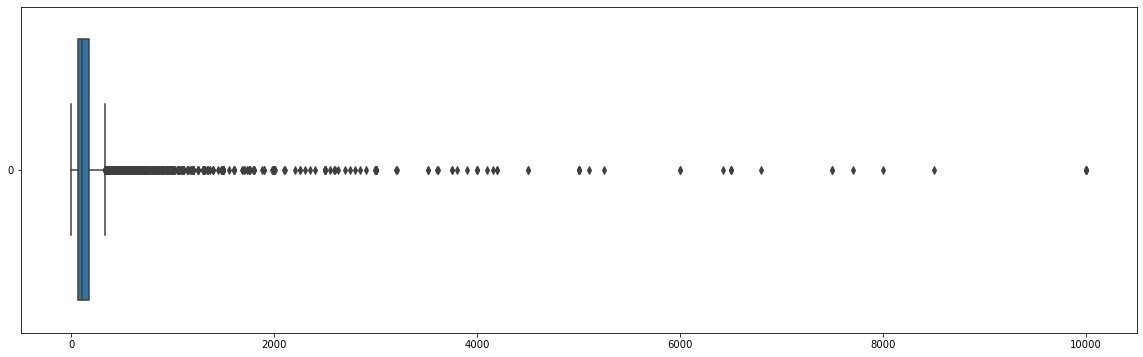

In [53]:
plt.figure(figsize=(20,6))
sns.boxplot(data=uni_listings["price"],orient='h')

In [74]:
uni_listings_corr = uni_listings.drop(['id','last_review','host_name'], axis=1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# change categorical data into numerical data 
uni_listings_corr['neighbourhood'] = labelencoder.fit_transform(uni_listings_corr['neighbourhood'])
uni_listings_corr['neighbourhood_group'] = labelencoder.fit_transform(
    uni_listings_corr['neighbourhood_group'])
uni_listings_corr['room_type'] = labelencoder.fit_transform(uni_listings_corr['room_type'])

In [75]:
uni_listings_corr.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,Clean & quiet apt home by the park,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365,2018.0,10.0
1,Skylit Midtown Castle,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355,2019.0,5.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,94,40.80902,-73.94190,1,150,3,0,NaN,1,365,NaN,NaN
3,Cozy Entire Floor of Brownstone,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194,2019.0,7.0
4,Entire Apt: Spacious Studio/Loft by central park,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0,2018.0,11.0


Text(0.5, 1.0, ' Correlation Analysis for Price')

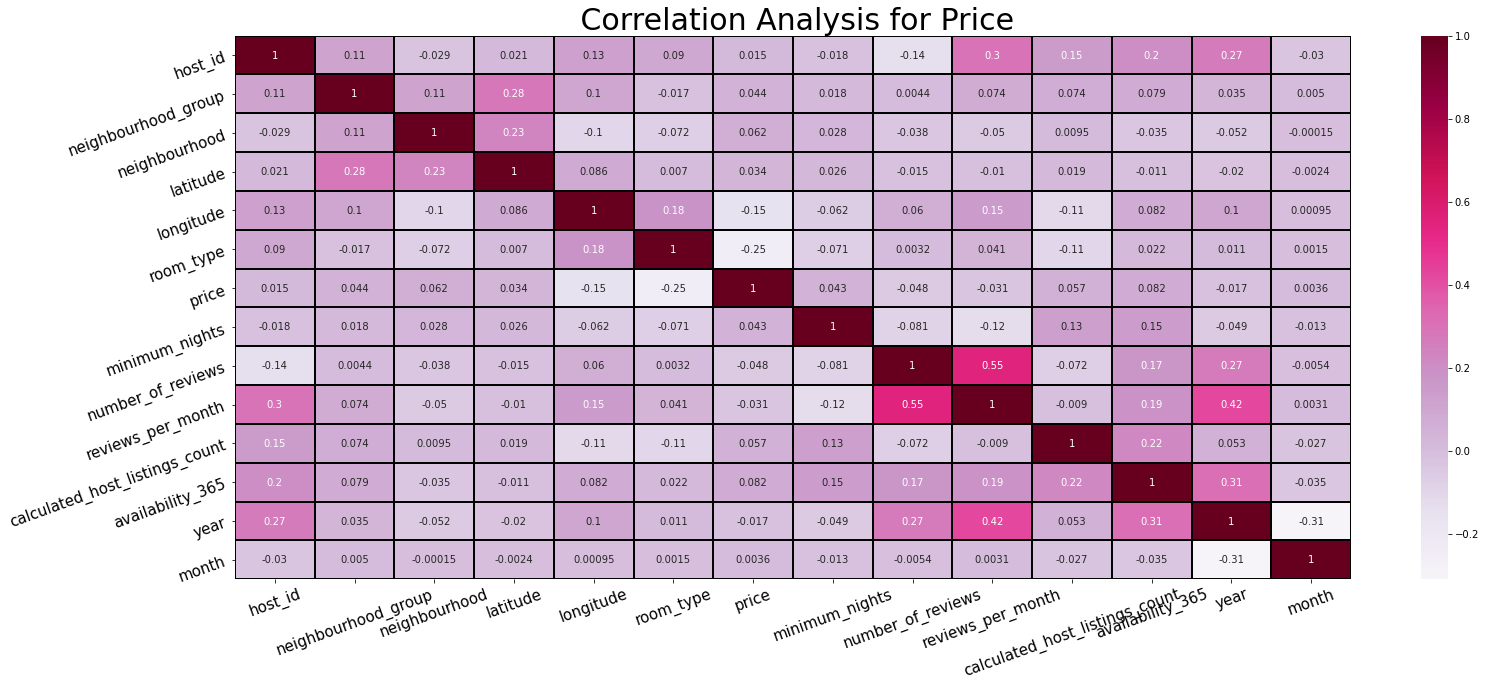

In [78]:
plt.figure(figsize=(25,10))

sns.heatmap(uni_listings_corr.corr(), annot=True,lw=1, linecolor='black', cmap='PuRd')
plt.xticks(rotation = 20, fontsize = 15)
plt.yticks(rotation = 20, fontsize = 15)
plt.title(' Correlation Analysis for Price', fontsize = 30)